In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\Phil-Jon-D\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_excel("C:/Users/Phil-Jon-D/Desktop/AY 2017-18/DWDM/Samples/CardiologyNumerical.xls")

In [3]:
df.head(5)

,age,sex,chest pain type,blood_pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum_heart_rate,angina,peak,slope,#colored vessels,thal,class
0,60,1,4,130,206,0,2,132,1,2.4,2,2,7,0
1,49,1,2,130,266,0,0,171,0,0.6,1,0,3,1
2,64,1,1,110,211,0,2,144,1,1.8,2,0,3,1
3,63,1,4,130,254,0,2,147,0,1.4,2,1,7,0
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7,0


In [4]:
# Removing First two (2) rows, not part of data set
df = df.drop([0,1],axis=0)

In [5]:
df.head(5)

,age,sex,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,thal,class
2,60,Male,Asymptomatic,130,206,False,Hyp,132,True,2.4,Flat,2,Rev,Sick
3,49,Male,Abnormal Angina,130,266,False,Normal,171,False,0.6,Up,0,Normal,Healthy
4,64,Male,Angina,110,211,False,Hyp,144,True,1.8,Flat,0,Normal,Healthy
5,63,Male,Asymptomatic,130,254,False,Hyp,147,False,1.4,Flat,1,Rev,Sick
6,53,Male,Asymptomatic,140,203,True,Hyp,155,True,3.1,Down,0,Rev,Sick


In [7]:
df.describe()

,age,sex,chest pain type,blood_pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum_heart_rate,angina,peak,slope,#colored vessels,thal,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,3.155116,131.623762,246.264026,0.148515,0.983498,149.646865,0.326733,1.039604,1.600660,0.666667,4.735974,0.544554
std,9.082101,0.466011,0.958941,17.538143,51.830751,0.356198,0.994883,22.905161,0.469794,1.161075,0.616226,0.933790,1.940231,0.498835
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,274.500000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [8]:
df.shape

(303, 14)

In [9]:
df.columns

Index(['age', 'sex', 'chest pain type', 'blood_pressure', 'cholesterol',
       'Fasting blood sugar <120', 'resting ecg', 'maximum_heart_rate',
       'angina', 'peak', 'slope', '#colored vessels', 'thal', 'class'],
      dtype='object')

In [4]:
df.dtypes

age                           int64
sex                           int64
chest pain type               int64
blood_pressure                int64
cholesterol                   int64
Fasting blood sugar <120      int64
resting ecg                   int64
maximum_heart_rate            int64
angina                        int64
peak                        float64
slope                         int64
#colored vessels              int64
thal                          int64
class                         int64
dtype: object

# First off multivariate linear regression

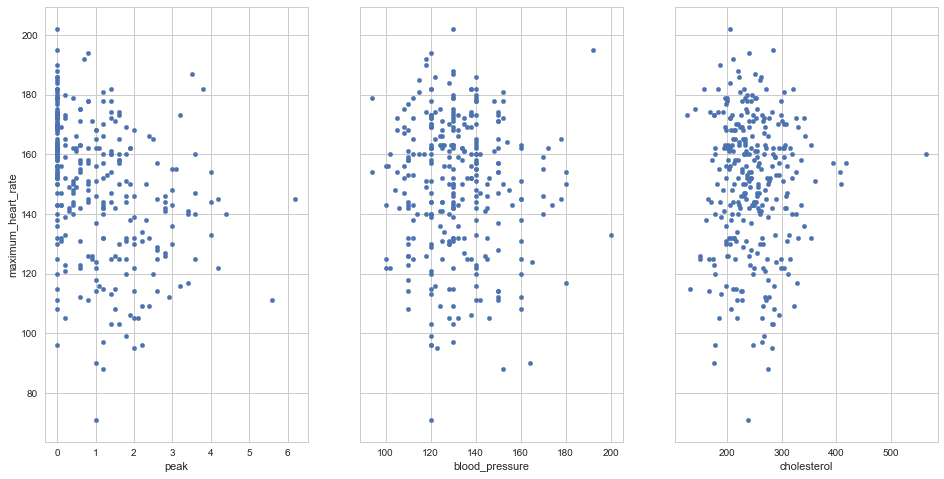

In [5]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='peak', y='maximum_heart_rate', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='blood_pressure', y='maximum_heart_rate', ax=axs[1])
df.plot(kind='scatter', x='cholesterol', y='maximum_heart_rate', ax=axs[2])

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.api as smf

x = df['maximum_heart_rate'].values.reshape(303, -1)
y = df[['blood_pressure','cholesterol']].values.reshape(-1,2)
results = smf.OLS(x,y).fit()
results.params
# print(results.summary())

array([0.81678155, 0.16225261])

In [7]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     3829.
Date:                Mon, 26 Mar 2018   Prob (F-statistic):          8.71e-215
Time:                        20:45:23   Log-Likelihood:                -1454.8
No. Observations:                 303   AIC:                             2914.
Df Residuals:                     301   BIC:                             2921.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8168      0.056     14.638      0.0

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.api as smf
from statsmodels.formula.api import ols
x = df['blood_pressure']
y = df['maximum_heart_rate']
z = df['class']
model = ols("z ~ x + y", df).fit()
# results = smf.OLS(x,y).fit()
# results.params
# print(results.summary())

,0,1
maximum_heart_rate,0.858677,1.607572


In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     36.01
Date:                Mon, 26 Mar 2018   Prob (F-statistic):           9.64e-15
Time:                        20:59:07   Log-Likelihood:                -186.11
No. Observations:                 303   AIC:                             378.2
Df Residuals:                     300   BIC:                             389.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3409      0.265     -1.288      0.1

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(df['maximum_heart_rate'].values.reshape(303,1),df[['cholesterol','blood_pressure']].values.reshape(-1,2),test_size=0.30,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(212, 1)
(91, 1)
(212, 2)
(91, 2)


In [15]:
results = smf.OLS(x,y).fit()
pred=results.predict(y)

C:\Users\Phil-Jon-D\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


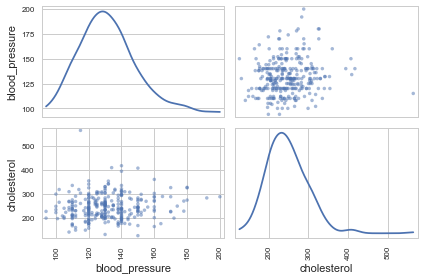

In [38]:
pd.tools.plotting.scatter_matrix(df.iloc[:,[3,4]], diagonal="kde")
plt.tight_layout()
plt.show()

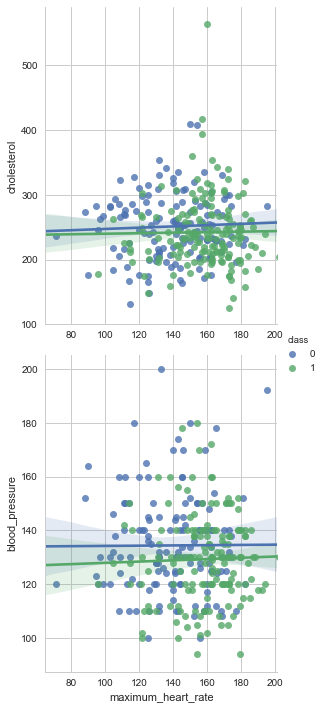

In [61]:
sns.pairplot(df, x_vars=["maximum_heart_rate"], y_vars=["cholesterol","blood_pressure"],
             hue="class", size=5, aspect=.8, kind="reg");

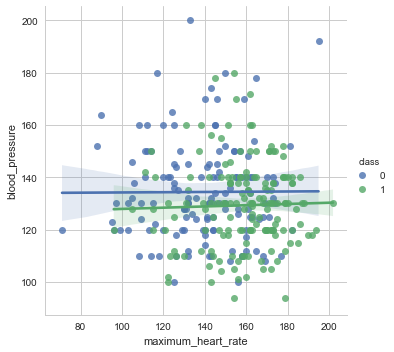

In [10]:
g = sns.lmplot(x='maximum_heart_rate', y='blood_pressure', hue="class",
               truncate=True, size=5, data=df)

Text(0.5,1,'Linear Regression')

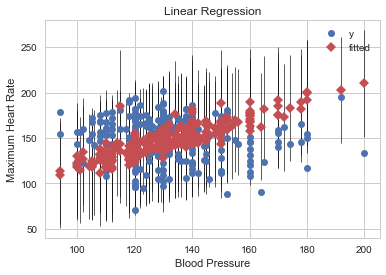

In [83]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("Maximum Heart Rate")
ax.set_xlabel("Blood Pressure")
ax.set_title("Linear Regression")

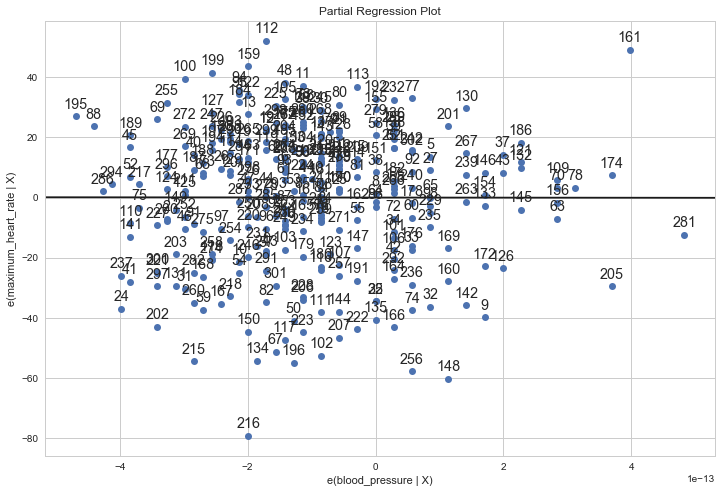

In [74]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("maximum_heart_rate", "blood_pressure", ["blood_pressure", "cholesterol"], data=df, ax=ax)

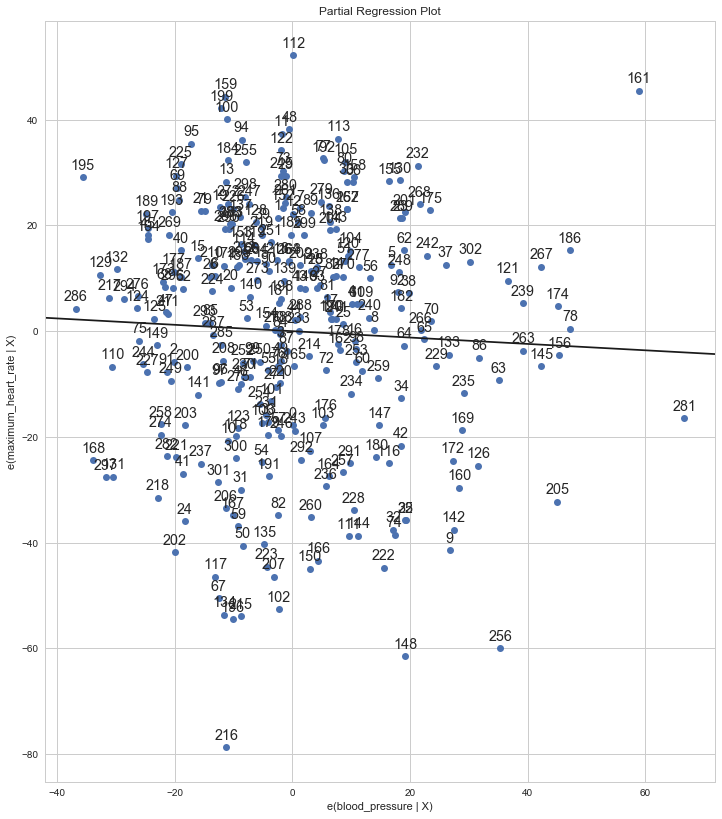

In [75]:
fix, ax = plt.subplots(figsize=(12,14))
fig = sm.graphics.plot_partregress("maximum_heart_rate", "blood_pressure", ["cholesterol"], data=df, ax=ax)

In [14]:
df['class'].value_counts()

1    165
0    138
Name: class, dtype: int64

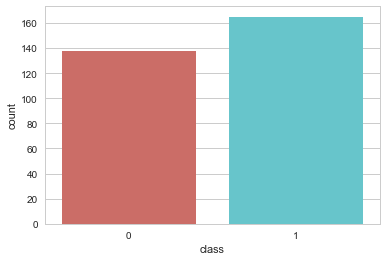

In [15]:
sns.countplot(x='class',data=df,palette='hls')

In [16]:
df.groupby('class').mean()

,age,sex,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,thal
class,,,,,,,,,,,,,
0,56.601449,0.826087,3.586957,134.398551,251.086957,0.159420,1.166667,139.101449,0.550725,1.585507,1.833333,1.144928,5.869565
1,52.496970,0.563636,2.793939,129.303030,242.230303,0.139394,0.830303,158.466667,0.139394,0.583030,1.406061,0.266667,3.787879


In [17]:
df.groupby('sex').mean()

,age,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,thal,class
sex,,,,,,,,,,,,,
0,55.677083,3.135417,133.083333,261.302083,0.12500,0.947917,151.125000,0.229167,0.876042,1.572917,0.552083,3.656250,0.750000
1,53.758454,3.164251,130.946860,239.289855,0.15942,1.000000,148.961353,0.371981,1.115459,1.613527,0.719807,5.236715,0.449275


In [18]:
df.groupby('thal').mean()

,age,sex,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,class
thal,,,,,,,,,,,,,
3,53.245509,0.520958,2.922156,129.377246,245.868263,0.119760,0.958084,155.526946,0.185629,0.678443,1.431138,0.449102,0.784431
6,56.666667,0.944444,3.333333,136.944444,227.000000,0.277778,1.166667,135.111111,0.444444,1.522222,2.055556,1.000000,0.333333
7,55.601695,0.872881,3.457627,133.991525,249.762712,0.169492,0.991525,143.542373,0.508475,1.477119,1.771186,0.923729,0.237288


# Next is Multivariate Logistic Regression to predict a patients health status

## Trying to determine good predictors

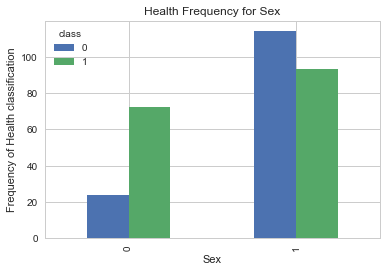

In [40]:
pd.crosstab(df.sex,df['class']).plot(kind='bar')
plt.title('Health Frequency for Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency of Health classification')
plt.savefig('class_fre_sex')

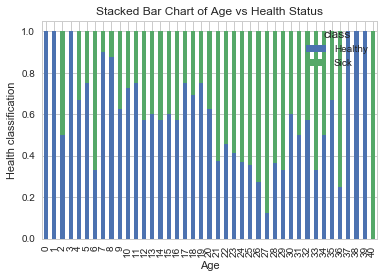

In [122]:
table=pd.crosstab(df.age,df['class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Health Status')
plt.xlabel('Age')
plt.ylabel('Health classification')
plt.savefig('age_vs_health_stack')

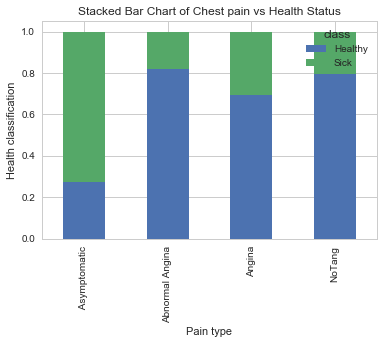

In [123]:
table=pd.crosstab(df['chest pain type'],df['class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Chest pain vs Health Status')
plt.xlabel('Pain type')
plt.ylabel('Health classification')
plt.savefig('pain_vs_health_stack')

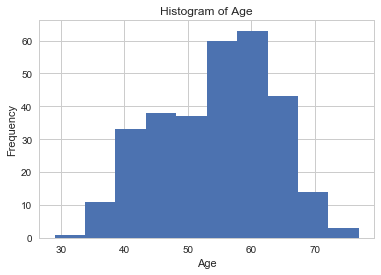

In [42]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

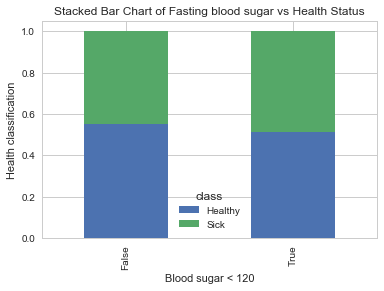

In [126]:
table=pd.crosstab(df['Fasting blood sugar <120'],df['class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Fasting blood sugar vs Health Status')
plt.xlabel('Blood sugar < 120')
plt.ylabel('Health classification')
plt.savefig('sugar_vs_health_stack')

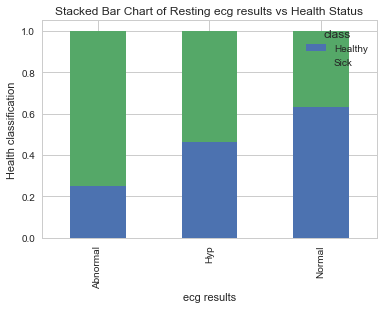

In [127]:
table=pd.crosstab(df['resting ecg'],df['class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Resting ecg results vs Health Status')
plt.xlabel('ecg results')
plt.ylabel('Health classification')
plt.savefig('ecg_vs_health_stack')

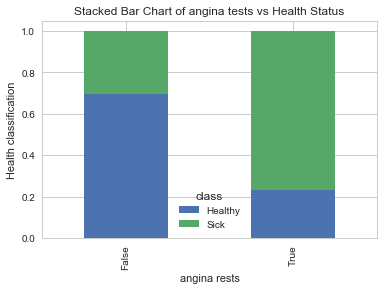

In [128]:
table=pd.crosstab(df['angina'],df['class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of angina tests vs Health Status')
plt.xlabel('angina rests')
plt.ylabel('Health classification')
plt.savefig('ang_vs_health_stack')

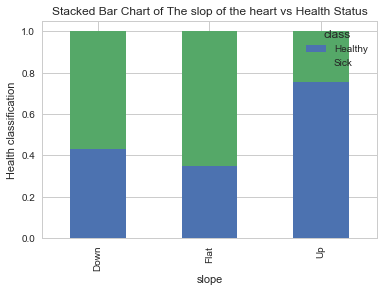

In [129]:
table=pd.crosstab(df['slope'],df['class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of The slop of the heart vs Health Status')
plt.xlabel('slope')
plt.ylabel('Health classification')
plt.savefig('slope_vs_health_stack')

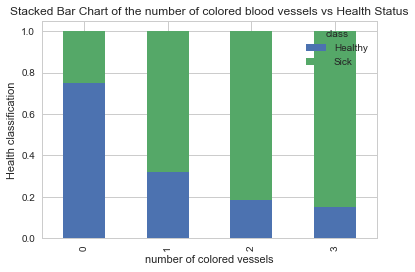

In [17]:
table=pd.crosstab(df['#colored vessels'],df['class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of the number of colored blood vessels vs Health Status')
plt.xlabel('number of colored vessels')
plt.ylabel('Health classification')
plt.savefig('vessel_vs_health_stack')

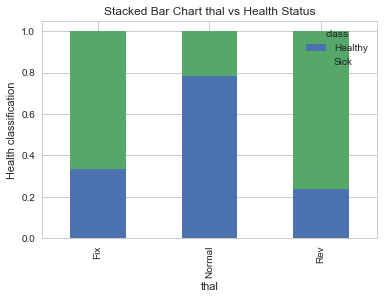

In [18]:
table=pd.crosstab(df['thal'],df['class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart thal vs Health Status')
plt.xlabel('thal')
plt.ylabel('Health classification')
plt.savefig('thal_vs_health_stack')

### It can be seen that sex, age, ecg results, presence of angina and the slope of the heart are good indicators of a patient being sick

In [41]:
# cat_vars=['sex','chest pain type','Fasting blood sugar <120','resting ecg','angina','slope','thal']
# for var in cat_vars:
#     cat_list='var'+'_'+var
#     cat_list = pd.get_dummies(df[var], prefix=var)
#     data1=df.join(cat_list)
#     data=data1
# cat_vars=['age','sex','chest pain type','Fasting blood sugar <120','resting ecg','angina','slope','thal']
# data_vars=df.columns.values.tolist()
to_keep=['class','chest pain type','#colored vessels','thal','peak','maximum_heart_rate']

In [42]:
data_final=df[to_keep]
data_final.columns.values

array(['class', 'chest pain type', '#colored vessels', 'thal', 'peak',
       'maximum_heart_rate'], dtype=object)

In [27]:
data_final.dtypes

class                   int64
chest pain type         int64
#colored vessels        int64
thal                    int64
peak                  float64
maximum heart rate      int64
dtype: object

In [43]:
data_final_vars=data_final.columns.values.tolist()
y=['class']
X=[i for i in data_final_vars if i not in y]

In [44]:
X

['chest pain type', '#colored vessels', 'thal', 'peak', 'maximum_heart_rate']

### Trying to determine best features using Recursive feature elimination

In [45]:
from sklearn import datasets
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True]
[1 1 1 1 1]


C:\Users\Phil-Jon-D\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
cols=['chest pain type','#colored vessels','thal','peak','maximum_heart_rate'] 
X=data_final[cols]
y=data_final['class']

In [48]:

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.380686
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.4476
Time:                        11:30:54   Log-Likelihood:                -115.35
converged:                       True   LL-Null:                       -208.82
                                        LLR p-value:                 2.406e-39
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
chest pain type       -0.4410      0.150     -2.934      0.003      -0.736      -0.146
#colo

### The p-values for all the fields except age are below 0.5 which indicates that they are import to the model

## Fitting the model

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


## Checking if our model generalizes well

In [51]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.844


The model had a 84% accuracy level and after validation still held the same accuracy which shows that it generalizes well.